In [363]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from pennylane import numpy as np
import pennylane as qml
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MaxAbsScaler 
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as confusion_matrix
from sklearn.metrics import f1_score as f1
from sklearn.metrics import recall_score as recall
from sklearn.decomposition import PCA 
from qiskit import *
import seaborn as sns
import plotly.express as px
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer, GradientDescentOptimizer

import matplotlib.pyplot as plt


In [621]:
mnist = load_digits()
pd.DataFrame(mnist.data).head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


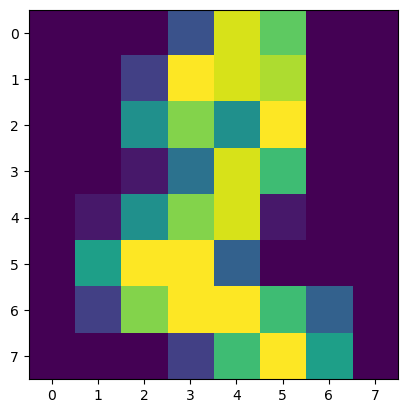

In [622]:
pd.DataFrame(mnist.target).head()
plt.imshow(mnist.images[2])

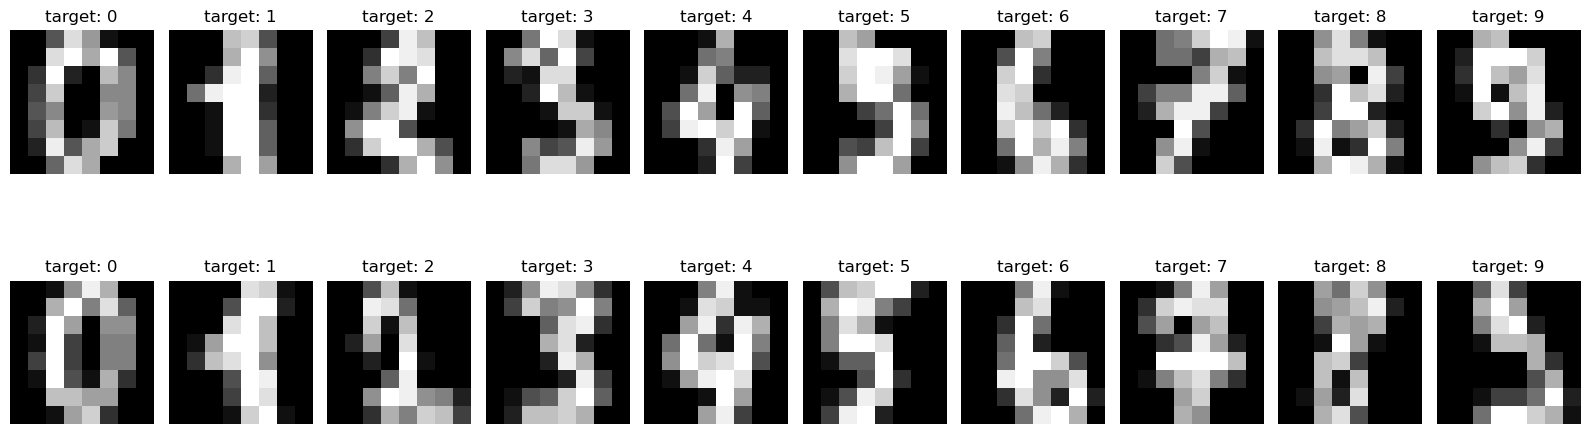

In [623]:
fig, axes = plt.subplots(2, 10, figsize=(16, 6))
for i in range(20):
    axes[i//10, i %10].imshow(mnist.images[i], cmap='gray')
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"target: {mnist.target[i]}")
    
plt.tight_layout()

In [705]:

number_of_data_points = 200
y = pd.DataFrame(mnist.target[0:number_of_data_points])

x_data = pd.DataFrame()
for i in range(len(mnist.images[0:number_of_data_points])):
    x=mnist.images[i]
    new_x = pd.DataFrame()
    for j in range(len(x[0])):
        new_val = pd.Series()
        new_val= pd.concat([new_val,pd.Series(x[j])])


        new_x= pd.concat([new_x,(new_val.to_frame().T)],axis=1,ignore_index= True)
    x_data = pd.concat([x_data,new_x],ignore_index=False,axis = 0)
    print(x_data)


    0    1    2     3    4    5    6    7    8    9   ...   54   55   56   57  \
0  0.0  0.0  5.0  13.0  9.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    58    59    60   61   62   63  
0  6.0  13.0  10.0  0.0  0.0  0.0  

[1 rows x 64 columns]
    0    1    2     3     4    5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
0  0.0  0.0  0.0  12.0  13.0  5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
0  0.0  0.0  11.0  16.0  10.0  0.0  0.0  

[2 rows x 64 columns]
    0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
0  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
0  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0

In [706]:
copyOfx = x_data

scaler = MaxAbsScaler() 

x_data = scaler.fit_transform(x_data)

normalizer = Normalizer().fit(x_data)


normalizer.transform(x_data)


array([[0.        , 0.        , 0.08710085, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.15401482, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.23745323, 0.16439069,
        0.        ],
       ...,
       [0.        , 0.        , 0.03067593, ..., 0.15337963, 0.01887749,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.09218692, ..., 0.18437384, 0.01891014,
        0.        ]])

In [707]:
pca = PCA(n_components = 3 ) 
 
 
 
xs_data = pca.fit_transform(x_data) 
 

In [708]:
for i in range(len(y[0])):       
    if y.loc[i,0]!=1:
        y.loc[i,0]= 0


In [709]:

x_train, x_test, y_train, y_test = train_test_split(xs_data, y, train_size = 0.8)

x_traindf = pd.DataFrame(x_train)
x_testdf = pd.DataFrame(x_test)
y_traindf = pd.DataFrame(y_train)
y_testdf = pd.DataFrame(y_test)

x_test =np.array(x_test)
x_train = np.array(x_train)
y_train = np.array(y_train)
y_test = np.array(y_test)


#y_test=y_test.transpose()[0]
ylist = []
y_train = y_train.transpose()
for i in range(len(y_train)):
    
    ylist.append(y_train[i])


y_train = np.array(ylist,requires_grad=False)
y_train=y_train[0]

ylist = []
y_test = y_test.transpose()
for i in range(len(y_test)):
    
    ylist.append(y_test[i])


y_test = np.array(ylist,requires_grad=False)
y_test=y_test[0]
xlist = []

for i in range(len(x_train)):
    
    xlist.append(x_train[i])


x_train = np.array(xlist,requires_grad=False)

X_train = x_train
X_test =x_test


In [486]:
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0
 0 0 0]


In [710]:

X_train = x_train
X_test =x_test
print(len(y_test))
print(len(X_test))
print(x_test)


40
40
[[ 0.33650422 -0.61796526  1.72042371]
 [-0.15969839 -0.41489715  1.08612664]
 [ 0.64385235 -0.11581524 -1.14883244]
 [ 1.80815602  0.07392076 -0.38590773]
 [ 0.64191158 -0.22453998 -0.91881513]
 [-0.69346639  0.59235017  1.15733909]
 [ 1.84161503 -0.59059613 -0.20227549]
 [-0.58481714  0.48253337  0.5687952 ]
 [ 0.57101421 -0.72805405 -0.56725411]
 [ 1.11405269  0.57658041 -0.57292139]
 [-0.81862481 -1.01490286 -1.2664056 ]
 [-1.30080901  1.08835825 -1.52191172]
 [-0.49115519 -0.99587275 -0.99675954]
 [-0.70784678 -0.89364672 -0.81715564]
 [-0.56523508  1.57913444  0.24866926]
 [ 0.29697711 -0.41287117  0.91763577]
 [ 0.24383355  0.23314626  0.51214266]
 [-0.96758426  1.53009908 -0.54381728]
 [ 1.75188343 -0.73635381 -0.35696477]
 [-0.32054636 -0.45456535  1.03478014]
 [-0.22774764 -0.47563286  0.38537938]
 [-1.59324227 -0.23391573  0.34676108]
 [-1.30081742  1.52802266 -0.87533899]
 [-0.90209457  1.3474915  -0.50728805]
 [ 0.16448231  0.42818024  0.37167096]
 [ 0.11457847  0.08

In [630]:
dev = qml.device("lightning.qubit", wires=1)
@qml.qnode(dev)
def qcircuit(params, x, y):

    for p in params:
        qml.Rot(*x, wires=0)
        qml.Rot(*p, wires=0)
    return qml.expval(qml.Hermitian(y, wires=[0]))



In [631]:

class Reuploader():
    
    num_layers =0
    learning_rate=0
    epochs=0 
    batch_size=0
    model = np.array
    opt = 0
    dev=0
    params=0
    state_labels =0
    label_0 = [[1], [0]]
    label_1 = [[0], [1]]
    
   

    def __init__(self,dev,num_layers = 4, learning_rate = 0.6, epochs= 10, batch_size = 32, ):

        self.num_layers = num_layers
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.opt = AdamOptimizer(learning_rate, beta1=0.9, beta2=0.999)
        self.dev = dev 
        self.params = np.random.uniform(size=(num_layers, 3), requires_grad=True)
        self.state_labels = np.array([self.label_0, self.label_1], requires_grad=False)
        

    
    def density_matrix(self,state):
        """Calculates the density matrix representation of a state.

        Args:
            state (array[complex]): array representing a quantum state vector

        Returns:
            dm: (array[complex]): array representing the density matrix
        """
        return state * np.conj(state).T






    def cost(self, params, x, y, state_labels=None):
        """Cost function to be minimized.

        Args:
            params (array[float]): array of parameters
            x (array[float]): 2-d array of input vectors
            y (array[float]): 1-d array of targets
            state_labels (array[float]): array of state representations for labels

        Returns:
            float: loss value to be minimized
        """
        # Compute prediction for each input in data batch
        loss = 0.0
        dm_labels = [self.density_matrix(s) for s in state_labels]
        for i in range(len(x)):
            f = qcircuit(params, x[i], dm_labels[y[i]])
            loss = loss + (1 - f) ** 2
        return loss / len(x)

    def test(self,params, x, y, state_labels=None):
        """
        Tests on a given set of data.

        Args:
            params (array[float]): array of parameters
            x (array[float]): 2-d array of input vectors
            y (array[float]): 1-d array of targets
            state_labels (array[float]): 1-d array of state representations for labels

        Returns:
            predicted (array([int]): predicted labels for test data
            output_states (array[float]): output quantum states from the circuit
        """
        fidelity_values = []
        dm_labels = [self.density_matrix(s) for s in state_labels]
        predicted = []

        for i in range(len(x)):
            fidel_function = lambda y: qcircuit(params, x[i], y)
            fidelities = [fidel_function(dm) for dm in dm_labels]
            best_fidel = np.argmax(fidelities)

            predicted.append(best_fidel)
            fidelity_values.append(fidelities)

        return np.array(predicted), np.array(fidelity_values)


    def accuracy_score(self,y_true, y_pred):
        """Accuracy score.

        Args:
            y_true (array[float]): 1-d array of targets
            y_predicted (array[float]): 1-d array of predictions
            state_labels (array[float]): 1-d array of state representations for labels

        Returns:
            score (float): the fraction of correctly classified samples
        """
    
        score = y_true == y_pred
        return score.sum() / len(y_true)


    def iterate_minibatches(self, inputs, targets, batch_size):
        """
        A generator for batches of the input data

        Args:
            inputs (array[float]): input data
            targets (array[float]): targets

        Returns:
            inputs (array[float]): one batch of input data of length `batch_size`
            targets (array[float]): one batch of targets of length `batch_size`
        """
        for start_idx in range(0, inputs.shape[0] - batch_size + 1, batch_size):
            idxs = slice(start_idx, start_idx + batch_size)
            yield inputs[idxs], targets[idxs]


    def fit(self,X_train, y_train):

        for it in range(self.epochs):
            for Xbatch, ybatch in self.iterate_minibatches(X_train, y_train, batch_size=self.batch_size):
                self.params, _, _, _ = self.opt.step(self.cost, self.params, Xbatch, ybatch, self.state_labels)

            predicted_train, fidel_train = self.test(self.params, X_train, y_train, self.state_labels)
            accuracy_train = self.accuracy_score(y_train, predicted_train)
            loss = self.cost(self.params, X_train, y_train, self.state_labels)
            

            res = [it + 1, loss, accuracy_train]
            print(
                "Epoch: {:2d} | Loss: {:3f} |  accuracy: {:3f} ".format(
                    *res
                )
            )
    def predict(self,X_test, y_test):

        predicted_test, fidel_test = self.test(self.params, X_test, y_test, self.state_labels)

        return predicted_test



    

    


In [743]:


model = Reuploader( dev, num_layers=2)

model.fit(X_train, y_train)


Epoch:  1 | Loss: 0.055480 |  accuracy: 0.912500 
Epoch:  2 | Loss: 0.048000 |  accuracy: 0.956250 
Epoch:  3 | Loss: 0.043003 |  accuracy: 0.956250 
Epoch:  4 | Loss: 0.038790 |  accuracy: 0.968750 
Epoch:  5 | Loss: 0.042564 |  accuracy: 0.950000 
Epoch:  6 | Loss: 0.036188 |  accuracy: 0.968750 
Epoch:  7 | Loss: 0.037110 |  accuracy: 0.968750 
Epoch:  8 | Loss: 0.036194 |  accuracy: 0.968750 
Epoch:  9 | Loss: 0.035665 |  accuracy: 0.968750 
Epoch: 10 | Loss: 0.036328 |  accuracy: 0.968750 


In [744]:
y_pred = model.predict(x_test,y_test)

In [745]:
px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_test, title=" Actual Results")

In [746]:
px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_pred , title=" Reupload with 2 Layers")

Recall(TP/FN+TP ):0.6666666666666666
Precsion(TP/FP+TP): 1.0 
F1 score function of presscion and recall:0.8 


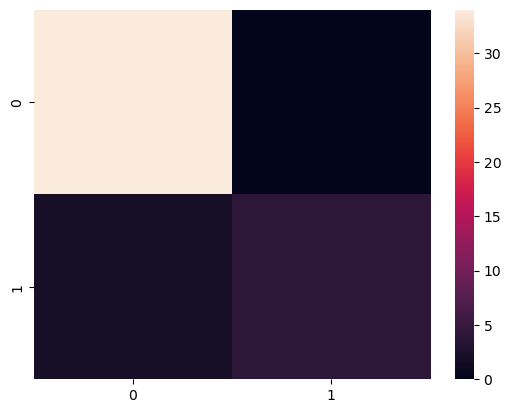

In [747]:
conMtx = confusion_matrix(y_test,y_pred)
sns.heatmap(conMtx)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)

print(f"Recall(TP/FN+TP ):{recall}")
print(f"Precsion(TP/FP+TP): {pre} ")
print(f"F1 score function of presscion and recall:{f1} ")

Epoch:  1 | Loss: 0.173956 |  accuracy: 0.743750 
Epoch:  2 | Loss: 0.208709 |  accuracy: 0.675000 
Epoch:  3 | Loss: 0.135302 |  accuracy: 0.812500 
Epoch:  4 | Loss: 0.084731 |  accuracy: 0.912500 
Epoch:  5 | Loss: 0.078742 |  accuracy: 0.906250 
Epoch:  6 | Loss: 0.049157 |  accuracy: 0.956250 
Epoch:  7 | Loss: 0.061306 |  accuracy: 0.975000 
Epoch:  8 | Loss: 0.047608 |  accuracy: 0.975000 
Epoch:  9 | Loss: 0.039808 |  accuracy: 0.968750 
Epoch: 10 | Loss: 0.030853 |  accuracy: 0.975000 
Recall(TP/FN+TP ):0.6666666666666666
Precsion(TP/FP+TP): 1.0 
F1 score function of presscion and recall:0.8 


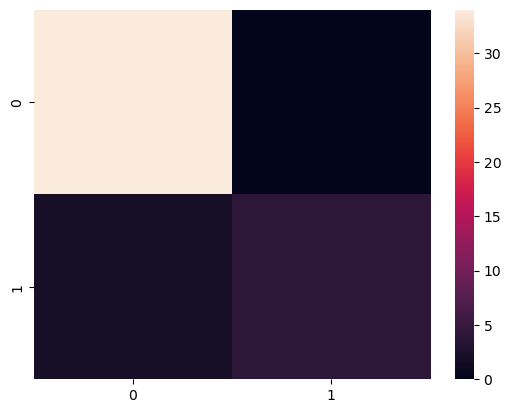

In [748]:
model = Reuploader( dev, num_layers=5)

model.fit(X_train, y_train)

conMtx = confusion_matrix(y_test,y_pred)
sns.heatmap(conMtx)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)

print(f"Recall(TP/FN+TP ):{recall}")
print(f"Precsion(TP/FP+TP): {pre} ")
print(f"F1 score function of presscion and recall:{f1} ")

In [749]:
px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_pred, title=" Reupload with 5 Layers")

In [445]:
class QRF:

 
    x_bags = []
    y_bags =[]
    QDT = []
    no_QDT=0
    depth =0
    sensetivity = 0


    def __init__(self, x_train, y_train,  no_QDT, depth =2, sensetivity=0.2 ):

        self.X_train= x_train
        self.y_train= y_train
        self.no_QDT = no_QDT
        self.depth = depth
        self.x_bags = [[] for j in range(no_QDT)]
        self.y_bags = [[] for j in range(no_QDT)]
        self.QDT = []
        self.sensetivity = sensetivity


      


    def Create_Models(self):

        for i in range(self.no_QDT):
            self.QDT.append(Reuploader(dev,self.depth))

    
    def data_bagging(self):

        k=0
        
        for j in range(self.no_QDT):
            x_bags =  []
            y_bags = []
            for i in range(int(len(self.X_train)/self.no_QDT)):
                
                
                x_bags.append(self.X_train[k])
                y_bags.append(self.y_train[k])
                k+=1
            self.x_bags[j] = (x_bags)
            self.y_bags[j] = (y_bags)
            
    
    def train(self):
    
        self.data_bagging()
        self.Create_Models()
        print(self.no_QDT)
        for i in range(len(self.QDT)):
            print(f" Training QDT no : {i+1}")
            self.QDT[i].fit(np.array(self.x_bags[i]),np.array(self.y_bags[i]))
            
    
    def predict(self,x_test,y_test):
        
        individual_results = []
        result = [3 for x in range(len(x_test))]
        sum_of_results = [0 for y in range(len(x_test)) ]
        for i  in range(len(self.QDT)):

            individual_results.append(self.QDT[i].predict(x_test,y_test))
            
           

            sum_of_results = sum_of_results + individual_results[i]
       
        for q in range(len(sum_of_results)):
            

            if sum_of_results[q]/self.no_QDT >= self.sensetivity:
                
                result[q] = 1
            else:
                result[q] = 0
        print(sum_of_results)
                

        
        
        
        return result,individual_results



        




        

    
        

In [756]:
qrf = QRF(X_train,y_train, no_QDT=2, sensetivity=0.5)

qrf.train()


2
 Training QDT no : 1
Epoch:  1 | Loss: 0.054235 |  accuracy: 0.925000 
Epoch:  2 | Loss: 0.053648 |  accuracy: 0.962500 
Epoch:  3 | Loss: 0.044398 |  accuracy: 0.987500 
Epoch:  4 | Loss: 0.027682 |  accuracy: 0.975000 
Epoch:  5 | Loss: 0.032856 |  accuracy: 0.987500 
Epoch:  6 | Loss: 0.039068 |  accuracy: 0.987500 
Epoch:  7 | Loss: 0.034173 |  accuracy: 0.987500 
Epoch:  8 | Loss: 0.026780 |  accuracy: 0.987500 
Epoch:  9 | Loss: 0.030976 |  accuracy: 0.962500 
Epoch: 10 | Loss: 0.032831 |  accuracy: 0.975000 
 Training QDT no : 2
Epoch:  1 | Loss: 0.099238 |  accuracy: 0.837500 
Epoch:  2 | Loss: 0.054440 |  accuracy: 0.937500 
Epoch:  3 | Loss: 0.048498 |  accuracy: 0.962500 
Epoch:  4 | Loss: 0.042303 |  accuracy: 0.975000 
Epoch:  5 | Loss: 0.040405 |  accuracy: 0.962500 
Epoch:  6 | Loss: 0.041120 |  accuracy: 0.950000 
Epoch:  7 | Loss: 0.045615 |  accuracy: 0.950000 
Epoch:  8 | Loss: 0.044014 |  accuracy: 0.950000 
Epoch:  9 | Loss: 0.042866 |  accuracy: 0.950000 
Epoch:

In [757]:

y_pred,y_ind = qrf.predict(X_test, y_test)


[0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


Recall(TP/FN+TP ):0.6666666666666666
Precsion(TP/FP+TP): 1.0 
F1 score function of presscion and recall:0.8 


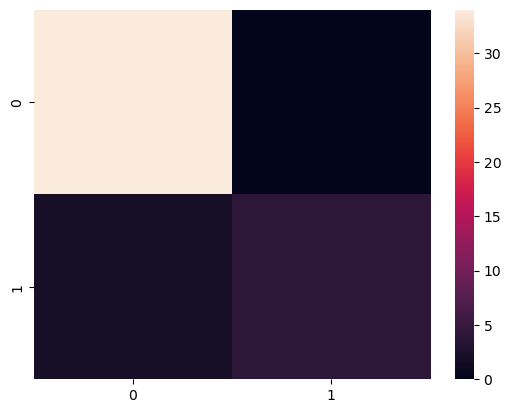

In [758]:
conMtx = confusion_matrix(y_test,y_pred)
sns.heatmap(conMtx)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)

print(f"Recall(TP/FN+TP ):{recall}")
print(f"Precsion(TP/FP+TP): {pre} ")
print(f"F1 score function of presscion and recall:{f1} ")

In [759]:
px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_pred, title="QRF with 2 QDT")

3
 Training QDT no : 1
Epoch:  1 | Loss: 0.053488 |  accuracy: 0.943396 
Epoch:  2 | Loss: 0.067712 |  accuracy: 0.905660 
Epoch:  3 | Loss: 0.036446 |  accuracy: 0.962264 
Epoch:  4 | Loss: 0.033329 |  accuracy: 0.981132 
Epoch:  5 | Loss: 0.039511 |  accuracy: 0.943396 
Epoch:  6 | Loss: 0.041002 |  accuracy: 0.943396 
Epoch:  7 | Loss: 0.039706 |  accuracy: 0.962264 
Epoch:  8 | Loss: 0.037722 |  accuracy: 0.981132 
Epoch:  9 | Loss: 0.035971 |  accuracy: 0.981132 
Epoch: 10 | Loss: 0.035406 |  accuracy: 0.962264 
 Training QDT no : 2
Epoch:  1 | Loss: 0.085222 |  accuracy: 0.849057 
Epoch:  2 | Loss: 0.064337 |  accuracy: 0.924528 
Epoch:  3 | Loss: 0.063040 |  accuracy: 0.962264 
Epoch:  4 | Loss: 0.056102 |  accuracy: 0.943396 
Epoch:  5 | Loss: 0.058519 |  accuracy: 0.924528 
Epoch:  6 | Loss: 0.064289 |  accuracy: 0.924528 
Epoch:  7 | Loss: 0.055537 |  accuracy: 0.962264 
Epoch:  8 | Loss: 0.048760 |  accuracy: 0.981132 
Epoch:  9 | Loss: 0.049072 |  accuracy: 0.981132 
Epoch:

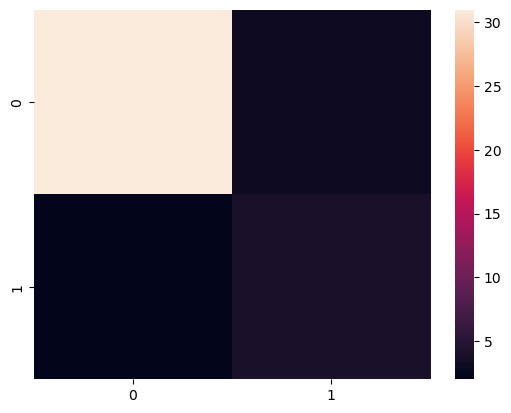

In [760]:
qrf = QRF(X_train,y_train, no_QDT=3, sensetivity=0.5)

qrf.train()
y_pred,individual_y = qrf.predict(X_test, y_test)
conMtx = confusion_matrix(y_test,y_pred)

sns.heatmap(conMtx)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)

print(f"Recall(TP/FN+TP ):{recall}")
print(f"Precsion(TP/FP+TP): {pre} ")
print(f"F1 score function of presscion and recall:{f1} ")

In [761]:
px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_pred ,title="QRF with 3 QDT")

5
 Training QDT no : 1
Epoch:  1 | Loss: 0.079449 |  accuracy: 0.937500 
Epoch:  2 | Loss: 0.049968 |  accuracy: 0.937500 
Epoch:  3 | Loss: 0.027935 |  accuracy: 1.000000 
Epoch:  4 | Loss: 0.037136 |  accuracy: 0.968750 
Epoch:  5 | Loss: 0.043420 |  accuracy: 0.968750 
Epoch:  6 | Loss: 0.039514 |  accuracy: 0.968750 
Epoch:  7 | Loss: 0.034201 |  accuracy: 0.968750 
Epoch:  8 | Loss: 0.030892 |  accuracy: 1.000000 
Epoch:  9 | Loss: 0.029332 |  accuracy: 1.000000 
Epoch: 10 | Loss: 0.029779 |  accuracy: 1.000000 
 Training QDT no : 2
Epoch:  1 | Loss: 0.050461 |  accuracy: 0.906250 
Epoch:  2 | Loss: 0.046338 |  accuracy: 0.968750 
Epoch:  3 | Loss: 0.026738 |  accuracy: 0.937500 
Epoch:  4 | Loss: 0.025761 |  accuracy: 0.968750 
Epoch:  5 | Loss: 0.031117 |  accuracy: 0.968750 
Epoch:  6 | Loss: 0.032587 |  accuracy: 0.968750 
Epoch:  7 | Loss: 0.030622 |  accuracy: 0.968750 
Epoch:  8 | Loss: 0.029001 |  accuracy: 0.968750 
Epoch:  9 | Loss: 0.028874 |  accuracy: 0.968750 
Epoch:

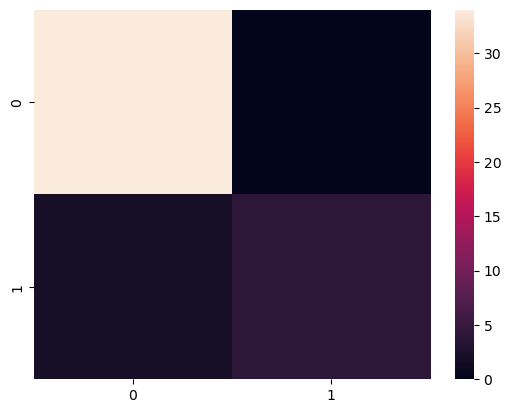

In [737]:
qrf = QRF(X_train,y_train, no_QDT=5, sensetivity=0.5)

qrf.train()
y_pred,individual_y = qrf.predict(X_test, y_test)
conMtx = confusion_matrix(y_test,y_pred)

sns.heatmap(conMtx)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)

print(f"Recall(TP/FN+TP ):{recall}")
print(f"Precsion(TP/FP+TP): {pre} ")
print(f"F1 score function of presscion and recall:{f1} ")

In [ ]:
px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_pred, title="QRF with 5 QDT" )

20
 Training QDT no : 1
Epoch:  1 | Loss: 0.101651 |  accuracy: 0.875000 
Epoch:  2 | Loss: 0.101651 |  accuracy: 0.875000 
Epoch:  3 | Loss: 0.101651 |  accuracy: 0.875000 
Epoch:  4 | Loss: 0.101651 |  accuracy: 0.875000 
Epoch:  5 | Loss: 0.101651 |  accuracy: 0.875000 
Epoch:  6 | Loss: 0.101651 |  accuracy: 0.875000 
Epoch:  7 | Loss: 0.101651 |  accuracy: 0.875000 
Epoch:  8 | Loss: 0.101651 |  accuracy: 0.875000 
Epoch:  9 | Loss: 0.101651 |  accuracy: 0.875000 
Epoch: 10 | Loss: 0.101651 |  accuracy: 0.875000 
 Training QDT no : 2
Epoch:  1 | Loss: 0.132266 |  accuracy: 0.875000 
Epoch:  2 | Loss: 0.132266 |  accuracy: 0.875000 
Epoch:  3 | Loss: 0.132266 |  accuracy: 0.875000 
Epoch:  4 | Loss: 0.132266 |  accuracy: 0.875000 
Epoch:  5 | Loss: 0.132266 |  accuracy: 0.875000 
Epoch:  6 | Loss: 0.132266 |  accuracy: 0.875000 
Epoch:  7 | Loss: 0.132266 |  accuracy: 0.875000 
Epoch:  8 | Loss: 0.132266 |  accuracy: 0.875000 
Epoch:  9 | Loss: 0.132266 |  accuracy: 0.875000 
Epoch

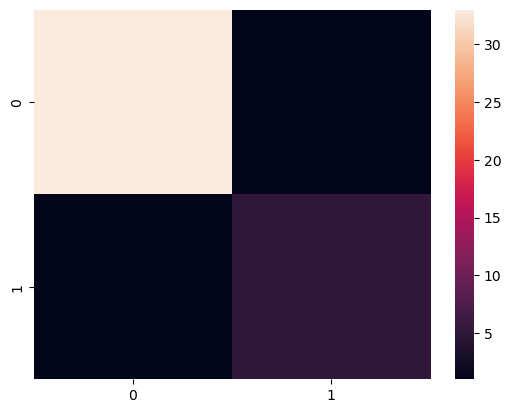

In [735]:
qrf = QRF(X_train,y_train, no_QDT=20, sensetivity= 0.5 ) 

qrf.train()
y_pred,individual_y = qrf.predict(X_test, y_test)
conMtx = confusion_matrix(y_test,y_pred)

sns.heatmap(conMtx)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)

print(f"Recall(TP/FN+TP ):{recall}")
print(f"Precsion(TP/FP+TP): {pre} ")
print(f"F1 score function of presscion and recall:{f1} ")

In [ ]:
px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_pred,title="QRF with 20 QDT")

Recall(TP/FN+TP ):0.6666666666666666
Precsion(TP/FP+TP): 1.0 
F1 score function of presscion and recall:0.8 


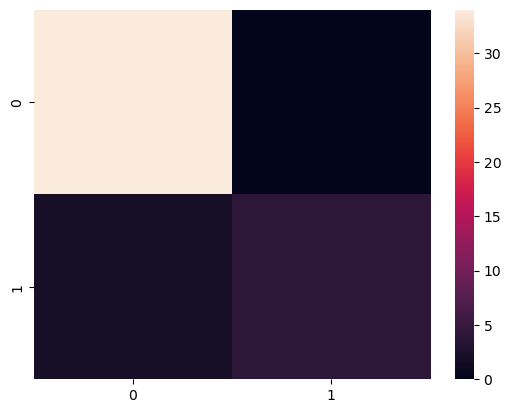

In [722]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=2)
model.fit(x_train,y_train)


y_pred = model.predict(X_test)

conMtx = confusion_matrix(y_test,y_pred)
sns.heatmap(conMtx)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)

print(f"Recall(TP/FN+TP ):{recall}")
print(f"Precsion(TP/FP+TP): {pre} ")
print(f"F1 score function of presscion and recall:{f1} ")


In [ ]:
px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_pred, title="Classical Random Forest")

Recall(TP/FN+TP ):0.6666666666666666
Precsion(TP/FP+TP): 1.0 
F1 score function of presscion and recall:0.8 


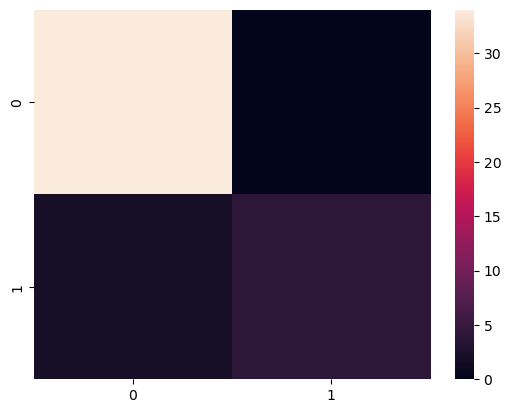

In [762]:
svm = SVC(kernel = 'rbf').fit(x_train, y_train)   

y_pred = svm.predict(X_test)

conMtx = confusion_matrix(y_test,y_pred)
sns.heatmap(conMtx)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)

print(f"Recall(TP/FN+TP ):{recall}")
print(f"Precsion(TP/FP+TP): {pre} ")
print(f"F1 score function of presscion and recall:{f1} ")

In [763]:
px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_pred, title="SVM With RBF Kernel")

In [764]:
nqubits = 4
devSVM = qml.device("lightning.qubit", wires=nqubits) 

In [766]:
def qAnastz(nqubits, data, parameters):
    nload = min(len(data), nqubits) 
    #print(nload)
    for i in range(nload): 
 
        qml.Hadamard(i) 
 
        qml.RX(parameters[i][0] * data[i], wires = i)
        #print(f"qubit:{i},value{parameters[i][0]}")
    for i in range(nload-1): 
        for j in range(i+1,nload-(1+i)):
            
            wires = [i,i+j]
            qml.IsingZZ(parameters[i][j+i]*data[i],wires)
            #print(f"qubit:{i},{j+1}value{parameters[i][j+i]}")
    for i in range(nload): 
 
        
 
        qml.RY(parameters[i][3] * data[i], wires = i)
    
    for i in range(nload): 

        qml.RX(parameters[i][0] * data[i], wires = i)
 
        qml.Hadamard(i) 

def init__para (nqubit,value):
    para= []
    for i in range(nqubit):
        
        p =[]
        for j in range(nqubit):
            p.append(value)
        
        para.append(p)
        
    return para

def optomizer(para,index,score,nqubits,Learning_rate):
    coef = (1-score)/nqubits # score-previous
    print(f"learning coef{coef}")
    for i  in range(len(para[index])):
        para[index][i] = para[index][i]+(Learning_rate*coef)
        
    return para

In [767]:
@qml.qnode(devSVM)

def kernel_circAntz(a, b): 
    qAnastz(nqubits,a,para)
    qml.adjoint(qAnastz)(nqubits,b,para)
    return qml.probs(wires = range(nqubits))
def qkernelAntz(A, B): 
 
    return np.array([[kernel_circAntz(a, b)[0] for b in B] for a in A])


iter = 10
para = init__para(nqubits,5.0)
index = 0
prescore = 0
paralist = list([[],[],[],[]])
optpara = para

for i in range(iter):
    svm = SVC(kernel = qkernelAntz,max_iter=1).fit(x_train, y_train)
    score= svm.score(x_train, y_train)
    if score > prescore:
        prescore = score
        optpara[index]= para[index]
    print(score)
    paralist[index] = optomizer(para=para,index=index,score=score,nqubits=nqubits,Learning_rate=100)
    print(f"parameter index {index} Iteration:{i} values{paralist[index][index]}")

c:\Users\John\anaconda32\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



0.85625
learning coef0.03593750000000001
parameter index 0 Iteration:0 values[8.59375, 8.59375, 8.59375, 8.59375]


c:\Users\John\anaconda32\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



0.3625
learning coef0.159375
parameter index 0 Iteration:1 values[24.53125, 24.53125, 24.53125, 24.53125]


c:\Users\John\anaconda32\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



0.475
learning coef0.13125
parameter index 0 Iteration:2 values[37.65625, 37.65625, 37.65625, 37.65625]


c:\Users\John\anaconda32\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



0.5875
learning coef0.103125
parameter index 0 Iteration:3 values[47.96875, 47.96875, 47.96875, 47.96875]


c:\Users\John\anaconda32\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



0.575
learning coef0.10625000000000001
parameter index 0 Iteration:4 values[58.59375, 58.59375, 58.59375, 58.59375]


c:\Users\John\anaconda32\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



0.7375
learning coef0.06562499999999999
parameter index 0 Iteration:5 values[65.15625, 65.15625, 65.15625, 65.15625]


c:\Users\John\anaconda32\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



0.68125
learning coef0.0796875
parameter index 0 Iteration:6 values[73.125, 73.125, 73.125, 73.125]


c:\Users\John\anaconda32\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



0.3125
learning coef0.171875
parameter index 0 Iteration:7 values[90.3125, 90.3125, 90.3125, 90.3125]


c:\Users\John\anaconda32\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



0.625
learning coef0.09375
parameter index 0 Iteration:8 values[99.6875, 99.6875, 99.6875, 99.6875]


c:\Users\John\anaconda32\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



0.4875
learning coef0.128125
parameter index 0 Iteration:9 values[112.5, 112.5, 112.5, 112.5]


In [780]:
para = optpara

#p1 = [5.0,5.0,5.0,5.0]
#p2 = [5.0,5.0,5.0,5.0]
#p3 = [40.15625, 40.15625, 40.15625, 40.15625]
#p4 = [19.53125, 19.53125, 19.53125, 19.53125]

#para = [p1,p2,p3,p4]



    
svm = SVC(kernel = qkernelAntz).fit(x_train, y_train)   
score= svm.score(x_test, y_test)
print(score)


0.85


Recall(TP/FN+TP ):0.0
Precsion(TP/FP+TP): 0.0 
F1 score function of presscion and recall:0.0 


c:\Users\John\anaconda32\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



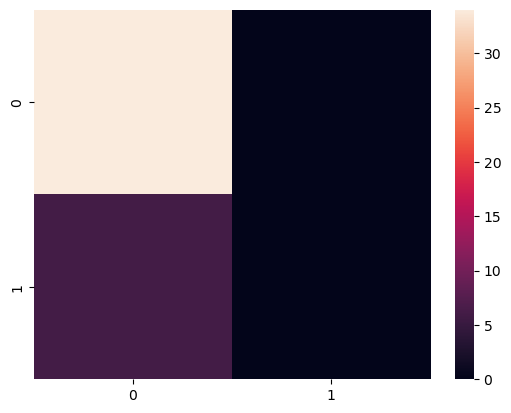

In [781]:
y_pred = svm.predict(X_test)
conMtx = confusion_matrix(y_test,y_pred)
sns.heatmap(conMtx)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)

print(f"Recall(TP/FN+TP ):{recall}")
print(f"Precsion(TP/FP+TP): {pre} ")
print(f"F1 score function of presscion and recall:{f1} ")

In [783]:
px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_pred, title="QSVM")